[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


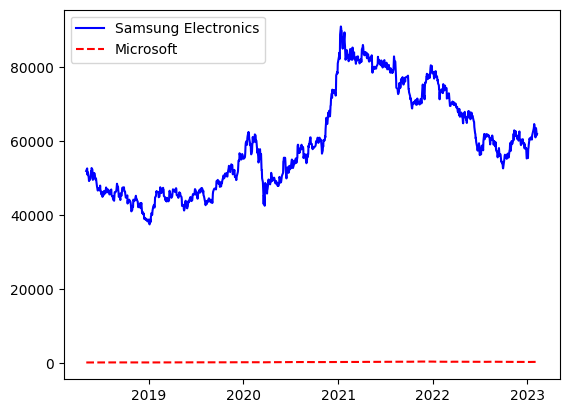

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
mstf = pdr.get_data_yahoo('MSFT', start='2018-05-04')

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(mstf.index, mstf.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()


### 변동률 구하기

In [11]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04 00:00:00+09:00    0.000000
2018-05-08 00:00:00+09:00    1.348748
2018-05-09 00:00:00+09:00   -3.231939
2018-05-10 00:00:00+09:00    1.375246
2018-05-11 00:00:00+09:00   -0.581395
Name: Close, dtype: float64

### 삼성전자의 주식 종가 히스토그램

count    1171.000000
mean        0.028169
std         1.624408
min        -6.387665
25%        -0.977398
50%         0.000000
75%         0.853141
max        10.470588
Name: Close, dtype: float64

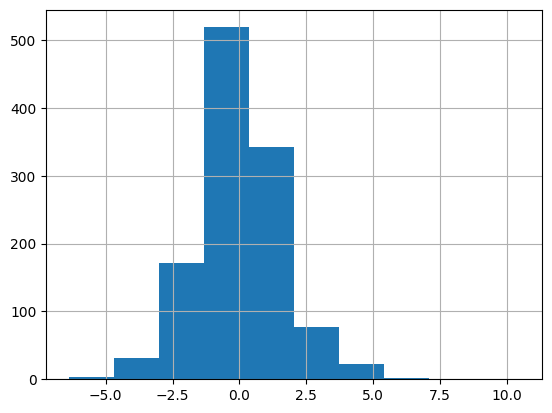

In [14]:
import matplotlib.pyplot as plt
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=10)
plt.grid(True)

sec_dpc.describe()

### 일간 변동률 (누적곱) 계산하기

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


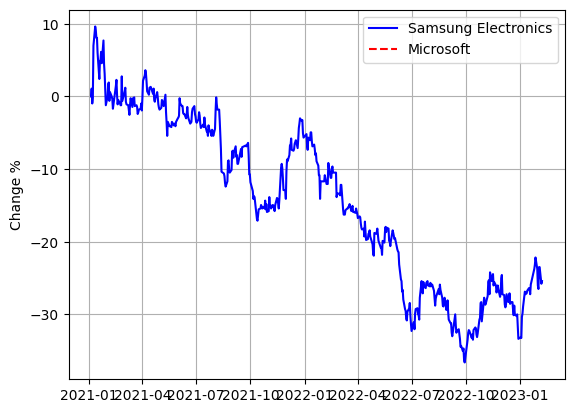

In [17]:
sec = pdr.get_data_yahoo('005930.KS', start='2021-01-01')
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1)*100
sec_dpc.iloc[0] = 0
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100

mstf = pdr.get_data_yahoo('MSFT', start='2021-01-01')
mstf_dpc = (mstf['Close']-mstf['Close'].shift(1))/mstf['Close'].shift(1)*100
mstf_dpc.iloc[0] = 0
mstf_dpc_cp = ((100+mstf_dpc)/100).cumprod()*100-100

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(mstf.index, mstf_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')